# Lab1 - Decision Tree

In this lab we are required to use a set of predefined Python functions to build and manipulate decision trees.

In [1]:
# import packages and data loading
import monkdata as m
import drawtree_qt5 as dt
from dtree import entropy, averageGain
import dtree as d
import numpy as np
from prettytable import PrettyTable
import random
import matplotlib.pyplot as plt

train1 = m.monk1
test1 = m.monk1test
train2 = m.monk2
test2 = m.monk2test
train3 = m.monk3
test3 = m.monk3test

## 2. MONK datasets


### Assignment 0: 

    Each one of the datasets has properties which makes them hard to learn. Motivate which of the three problems is most difficult for a decision tree algorithm to learn. 
  
**Answer 0**  
MONK-2 is hardest for a decision tree algorithm to learn.   
1. For dataset 1(MONK-1), there are only three atrributes $\{A1, A2, A5\}$ which influence the final results, which means we only need a tree with depth equal to 3 then we could classify all samples. 
2. For dataset 2(MONK-2), all atrributes are involved. Thus we need a more complicated tree with depth equal to 6 to classify all samples.
3. For dataset 3(MONK-3), it is also a little hard because it has 5% additional noise (misclassification) and it has the least training data. But fortunately, only three atrributes are involved so the tree won't be too deep.

## 3. Entropy

### Assignment 1: 

    The file dtree.py defines a function entropy which calculates the entropy of a dataset. Import this file along with the monks datasets and use it to calculate the entropy of the training datasets.

In [2]:
def assign1():
    entropy1 = entropy(train1)
    print("Entropy of training set 1: {}".format(entropy1))
    entropy2 = entropy(train2)
    print("Entropy of training set 2: {}".format(entropy2))
    entropy3 = entropy(train3)
    print("Entropy of training set 3: {}".format(entropy3))
    
assign1()

Entropy of training set 1: 1.0
Entropy of training set 2: 0.957117428264771
Entropy of training set 3: 0.9998061328047111


### Assignment 2: 
    Explain entropy for a uniform distribution and a non-uniform distribution, present some example distributions with high and low entropy.
    
**Answer 2**  
1. The entropy for a uniform distribution is high. More Specifically, it is equal to $log_2 N$, where $N$ is the sample size. 
2. The entropy for a non-uniform distribution is low.
3. Examples:
    * High entropy: Tossing a fair coin or rolling a die.
    * Low entropy: Tossing a unfair coin or rolling a fake die.

## 4. Information Gain

### Assignment 3: 
    Use the function averageGain (defined in dtree.py) to calculate the expected information gain corresponding to each of the six attributes. Note that the attributes are represented as in- stances of the class Attribute (defined in monkdata.py) which you can access via m.attributes[0], ..., m.attributes[5]. Based on the results, which attribute should be used for splitting the examples at the root node?

In [3]:
def assign3():
    names = globals()
    print("                         Information Gain                           ")
    table = PrettyTable(['Dataset', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6'])
    for j in range(1,4):
        trainset =  names.get('train' + str(j))
        nums = []
        for i in range(len(m.attributes)):
            nums.append(round(averageGain(trainset, m.attributes[i]),5))
        table.add_row(np.concatenate((["MONK" + str(j)], nums), axis=0))
    print(table)
assign3()




                         Information Gain                           
+---------+---------+---------+---------+---------+---------+---------+
| Dataset |    A1   |    A2   |    A3   |    A4   |    A5   |    A6   |
+---------+---------+---------+---------+---------+---------+---------+
|  MONK1  | 0.07527 | 0.00584 | 0.00471 | 0.02631 | 0.28703 | 0.00076 |
|  MONK2  | 0.00376 | 0.00246 | 0.00106 | 0.01566 | 0.01728 | 0.00625 |
|  MONK3  | 0.00712 | 0.29374 | 0.00083 | 0.00289 | 0.25591 | 0.00708 |
+---------+---------+---------+---------+---------+---------+---------+


Based on the above result regarding information gain, the attribute $A5$ performs well on training sets MONK-1 and MONK-2 while the attribute $A2$ is best for training sets MONK-3, because they all have maximum information gain.

### Assignment 4:
    For splitting we choose the attribute that maximizes the information gain, Eq.3. Looking at Eq.3 how does the entropy of the subsets, Sk, look like when the information gain is maximized? How can we motivate using the information gain as a heuristic for picking an attribute for splitting? Think about reduction in entropy after the split and what the entropy implies.
    
    
**Answer 4**

1. The entropy of the subsets $S_k$ is decreasing when the information gain is maximized. Since the uncertainty of the subset decreses when we obtain more information. 

2. When we maximize the information gain then we can select an attribute for splitting to decrease the uncertainty in the subsets the most, which means that the newly create subsets have a lower entropy. Then the dataset becomes more non-uniform and concentrated, which means it is more certain about the classification task.



## 5. Building Decision Trees


Split the monk1 data into subsets according to the selected attribute using the function select (again, defined in dtree.py) and compute the information gains for the nodes on the next level of the tree. Which attributes should be tested for these nodes?

In [4]:
attr = m.attributes[4]

In [5]:
dataset1 = d.select(train1, attr, 1)
dataset2 = d.select(train1, attr, 2)
dataset3 = d.select(train1, attr, 3)
dataset4 = d.select(train1, attr, 4)

In [6]:
names = globals()
print("                         Information Gain                           ")
table = PrettyTable(['Dataset', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6'])
for j in range(1,5):
    trainset =  names.get('dataset' + str(j))
    nums = []
    for i in range(len(m.attributes)):
        nums.append(round(averageGain(trainset, m.attributes[i]),5))
    table.add_row(np.concatenate((["dataset" + str(j)], nums), axis=0))
print(table)

                         Information Gain                           
+----------+---------+---------+---------+---------+-----+---------+
| Dataset  |    A1   |    A2   |    A3   |    A4   |  A5 |    A6   |
+----------+---------+---------+---------+---------+-----+---------+
| dataset1 |   0.0   |   0.0   |   0.0   |   0.0   | 0.0 |   0.0   |
| dataset2 | 0.04022 | 0.01506 | 0.03727 | 0.04889 | 0.0 | 0.02581 |
| dataset3 | 0.03306 |  0.0022 | 0.01798 | 0.01912 | 0.0 | 0.04511 |
| dataset4 | 0.20629 |  0.0339 | 0.02591 | 0.07593 | 0.0 | 0.00332 |
+----------+---------+---------+---------+---------+-----+---------+


* For A5 == 1: The dataset is pure, you don't need to test any attributes
* For A5 == 2: attribute A4 should be tested 
* For A5 == 3: attribute A6 should be tested 
* For A5 == 4: attribute A1 should be tested 

In [7]:
# dataset 1 is pure
print("--- A5 == 1:")
print(d.mostCommon(dataset1))
print()
print()

# dataset2: attribute 4
print("--- A5 == 2:")
print()
attr = m.attributes[3]
print("{} == 1:".format(attr))
print(d.mostCommon(d.select(dataset2, attr, 1)))
print("{} == 2:".format(attr))
print(d.mostCommon(d.select(dataset2, attr, 2)))
print("{} == 3:".format(attr))
print(d.mostCommon(d.select(dataset2, attr, 3)))
print()
print()

# dataset3: attribute 6
print("--- A5 == 3:")
print()
attr = m.attributes[5]
print("{} == 1:".format(attr))
print(d.mostCommon(d.select(dataset3, attr, 1)))
print("{} == 2:".format(attr))
print(d.mostCommon(d.select(dataset3, attr, 2)))
print()

# dataset4: attribute 1
print("--- A5 == 4:")
print()
attr = m.attributes[0]
print("{} == 1:".format(attr))
print(d.mostCommon(d.select(dataset4, attr, 1)))
print("{} == 2:".format(attr))
print(d.mostCommon(d.select(dataset4, attr, 2)))
print("{} == 3:".format(attr))
print(d.mostCommon(d.select(dataset4, attr, 3)))
print()
print()


#t1 = d.buildTree(train1, m.attributes, maxdepth=2)
#dt.drawTree(t1)


--- A5 == 1:
True


--- A5 == 2:

A4 == 1:
False
A4 == 2:
False
A4 == 3:
False


--- A5 == 3:

A6 == 1:
False
A6 == 2:
False

--- A5 == 4:

A1 == 1:
False
A1 == 2:
False
A1 == 3:
True




The result of a predefined routine for ID3 is shown as a picture below. We can see that the result is consistent with the manually generated result.

![img](../img/dtree1.png)

### Assignment 5: 
    Build the full decision trees for all three Monk datasets using buildTree. Then, use the function check to mea- sure the performance of the decision tree on both the training and test datasets.
    Compute the train and test set errors for the three Monk datasets for the full trees. Were your assumptions about the datasets correct? Explain the results you get for the training and test datasets.

In [8]:
def assign5():
    
    names = globals() 
    table = PrettyTable(['Dataset', 'E-train', 'E-test'])
    for j in range(1,4):
        trainset = names.get('train' + str(j))
        testset = names.get('test' + str(j))
        t = d.buildTree(trainset, m.attributes)
        table.add_row(np.concatenate((["MONK" + str(j)], [round(1-d.check(t, trainset),5), round(1-d.check(t, testset),5)]), axis=0))
    print(table)
        
#'''
t1 = d.buildTree(train1, m.attributes)
t2 = d.buildTree(train2, m.attributes)
t3 = d.buildTree(train3, m.attributes)
dt.drawTree(t1)
#dt.drawTree(t2)
#dt.drawTree(t3)
#'''
#assign5()

SystemExit: 0

/Users/zyj/Library/Python/3.6/lib/python/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## 6. Pruning

### Assignment 6:

    Explain pruning from a bias variance trade-off perspective.
    
**Answer 6**:

Variance refers to the amount by which the decision tree would change if we estimated it using a different training data set while bias refers to the error that is introduced by approximating a real-life problem. Decision trees always have a higher variance since the models are over-complex and overfitting due to growing a full tree which fits for all rules. Therefore, pruning the tree can increase the bias and reduce the variance.

### Assignment 7: 
    Evaluate the effect pruning has on the test error for the monk1 and monk3 datasets, in particular determine the optimal partition into training and pruning by optimizing the parameter fraction. Plot the classification error on the test sets as a function of the parameter 
$$fraction \in \{0.3, 0.4, 0.5, 0.6, 0.7, 0.8\}$$

    Note that the split of the data is random. We therefore need to compute the statistics over several runs of the split to be able to draw any conclusions. Reasonable statistics includes mean and a measure of the spread. Do remember to print axes labels, legends and data points as you will not pass without them.

+--------------+---------+---------+---------+---------+---------+---------+
|   Dataset    |   0.3   |   0.4   |   0.5   |   0.6   |   0.7   |   0.8   |
+--------------+---------+---------+---------+---------+---------+---------+
| MONK1 - MEAN | 0.23271 | 0.20919 |  0.1778 | 0.16275 | 0.14012 | 0.13569 |
| MONK3 - MEAN | 0.09171 | 0.07403 | 0.06125 | 0.05586 |  0.0525 | 0.05764 |
| MONK1 - STD  | 0.04368 | 0.04316 | 0.04548 | 0.04983 | 0.05431 | 0.04554 |
| MONK3 - STD  | 0.06093 | 0.04551 | 0.03749 | 0.03318 | 0.02465 | 0.02791 |
+--------------+---------+---------+---------+---------+---------+---------+


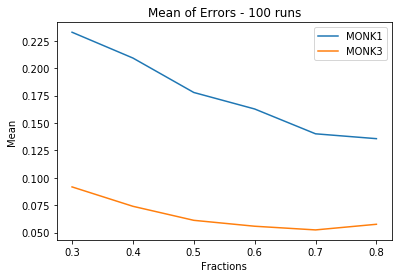

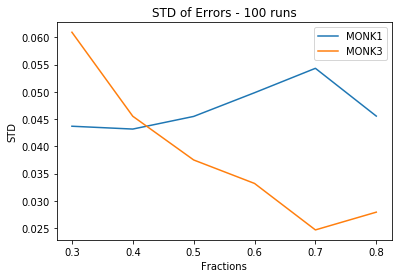

In [11]:
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def pruned_error(data, test):
    fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
    pruned_trees_error = []

    for fraction in fractions:
        train, val = partition(data, fraction)
        tree = d.buildTree(train, m.attributes)
        ptrees = d.allPruned(tree)
        
        best_acc = d.check(tree, val)
        best_tree = tree

        for t in ptrees:
            temp_acc = d.check(t, val)
            if best_acc < temp_acc:
                best_acc = temp_acc
                best_tree = t
        pruned_trees_error.append(round(1 - d.check(best_tree, test),5))

    return pruned_trees_error


def assign7():
    epoch = 100
    
    monk1_pruned =  np.transpose([pruned_error(train1, test1) for i in range(epoch)])
    monk3_pruned =  np.transpose([pruned_error(train3, test3) for i in range(epoch)])


    mean1 = np.around(np.mean(monk1_pruned, axis=1), decimals=5)
    mean3 = np.around(np.mean(monk3_pruned, axis=1), decimals=5)
    std1 = np.around(np.std(monk1_pruned, axis=1), decimals=5)
    std3 = np.around(np.std(monk3_pruned, axis=1), decimals=5)

    table = PrettyTable(['Dataset', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'])
    table.add_row(np.concatenate((['MONK1 - MEAN'], mean1), axis=0))
    table.add_row(np.concatenate((['MONK3 - MEAN'], mean3), axis=0))
    table.add_row(np.concatenate((['MONK1 - STD'], std1), axis=0))
    table.add_row(np.concatenate((['MONK3 - STD'], std3), axis=0))
    print(table)

    fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

    plt.figure()
    plt.title('Mean of Errors - {} runs'.format(epoch))
    plt.xlabel('Fractions')
    plt.ylabel('Mean')
    line1, = plt.plot(fractions, mean1, label="MONK1")
    line3, = plt.plot(fractions, mean3, label="MONK3")
    plt.legend()
    plt.show()    
    
    plt.title('STD of Errors - {} runs'.format(epoch))
    plt.xlabel('Fractions')
    plt.ylabel('STD')
    line1, = plt.plot(fractions, std1, label="MONK1")
    line3, = plt.plot(fractions, std3, label="MONK3")
    plt.legend()
    
    plt.show()    

assign7()

**Answer:**

The mean error for MONK1 reaches its lowest point with a partition at 0.8 while The mean error for MONK3 reaches its lowest point with a partition at 0.7. Besides, compared to the errors of full trees, we could see the effect pruning has on the test errors for the two datasets. Pruned tree is less complicated and it could reduce the model's variance. At the same time, more training data resulting from higher fraction could reduce the model' bias. As the two parts work together and reach a balance, the model operates better.
